* data loading

In [2]:
import numpy as np
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
# Load the preprocessed dataset
file_path = r"C:\Users\beema\Downloads\DeepLernProject\Textsumm\cnn_dailymail\train.csv"
df = pd.read_csv(file_path)

In [4]:

# Check the first few rows of the dataset
df.head(5)

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


* data cleaning

In [6]:
df.isnull().sum()

id            0
article       0
highlights    0
dtype: int64

In [7]:
# Initialize NLTK tools
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\beema\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\beema\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\beema\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Initialize the lemmatizer and stop words list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [9]:
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a single string
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [11]:
# Apply the preprocessing function to the 'article' and 'highlights' columns
df['cleaned_article'] = df['article'].apply(preprocess_text)
df['cleaned_highlights'] = df['highlights'].apply(preprocess_text)

In [12]:
# Display the first few rows of the cleaned data
print("\nCleaned Data:")
print(df[['cleaned_article', 'cleaned_highlights']].head())


Cleaned Data:
                                     cleaned_article  \
0  associated press published est october updated...   
1  cnn ralph mata internal affair lieutenant miam...   
2  drunk driver killed young woman headon crash c...   
3  cnn breezy sweep pen president vladimir putin ...   
4  fleetwood team still record sky bet league one...   

                                  cleaned_highlights  
0  bishop john folda north dakota taking time dia...  
1  criminal complaint cop used role help cocaine ...  
2  craig ecclestontodd drunk least three pint dri...  
3  nina do santos say europe must ready accept sa...  
4  fleetwood top league one win scunthorpe peterb...  


In [13]:
# Save the cleaned data to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)

print("Cleaned data saved to 'cleaned_dataset.csv'")

Cleaned data saved to 'cleaned_dataset.csv'


* data exploration

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Calculate the length of articles and highlights
df['article_len'] = df['cleaned_article'].apply(lambda x: len(x.split()))
df['highlights_len'] = df['cleaned_highlights'].apply(lambda x: len(x.split()))

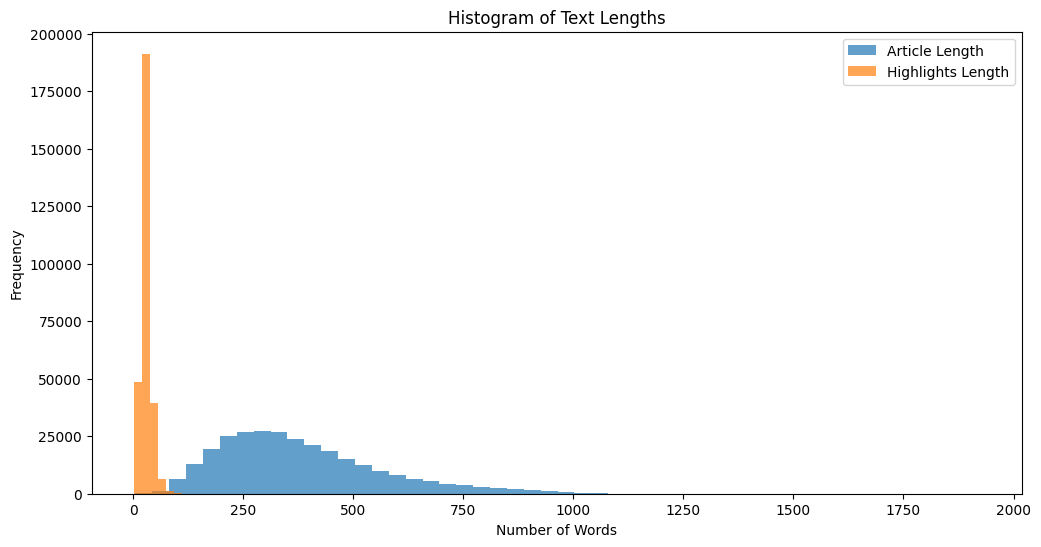

In [16]:
# Plot a histogram of article lengths
plt.figure(figsize=(12, 6))
plt.hist(df['article_len'], bins=50, alpha=0.7, label='Article Length')
plt.hist(df['highlights_len'], bins=50, alpha=0.7, label='Highlights Length')
plt.title('Histogram of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

* feature engineering

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
# Define tokenizer with a large number of words
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned_article'])

In [19]:
# Convert articles and highlights to sequences of integers
article_sequences = tokenizer.texts_to_sequences(df['cleaned_article'])
highlights_sequences = tokenizer.texts_to_sequences(df['cleaned_highlights'])

In [20]:
# Pad sequences to ensure uniform input size
max_len = 300 
article_padded = pad_sequences(article_sequences, maxlen=max_len, padding='post')
highlights_padded = pad_sequences(highlights_sequences, maxlen=max_len, padding='post')

In [21]:
# Display the shape of the padded sequences
print("Article Padded Shape:", article_padded.shape)
print("Highlights Padded Shape:", highlights_padded.shape)

Article Padded Shape: (287113, 300)
Highlights Padded Shape: (287113, 300)


* model selection

In [22]:
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Concatenate, TimeDistributed, Bidirectional, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
# Example configuration
'''vocab_size = 10000  # Size of the vocabulary
embedding_dim = 64  # Embedding dimensions
latent_dim = 128  # Number of LSTM units
max_len_X = 500  # Max length of input sequence (articles)
max_len_y = 50   # Max length of output sequence (summaries)'''

In [25]:
# Model architecture
# Define the model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(256, return_sequences=True)))

# Dropout layer for regularization
model.add(Dropout(0.5))

# Another LSTM layer
model.add(LSTM(256, return_sequences=True))

# TimeDistributed Dense layer to output a prediction for each time step
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with the optimal parameters
history = model.fit(article_padded, highlights_padded.reshape((-1, max_len, 1)),
                    epochs=5,  # Increase epochs if needed
                    batch_size=32,  # You can try different batch sizes
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/5
3323/7178 ━━━━━━━━━━━━━━━━━━━━ 5:16:19 5s/step - accuracy: 0.9066 - loss: 0.8280

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Step 7: Save the Model and Tokenizer
import pickle

# Save the model
model.save('text_summarization_model.h5')

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)